In [1]:
from IPython.display import display, HTML
display(HTML("<style>div.container { width:100% !important; }</style>"))

In [1]:
import numpy as np
import tensorflow as tf                              # tensorflow 기본 import
from tensorflow.keras.models import Sequential       # model box 구성
from tensorflow.keras.layers import Flatten, Dense, Input # model 안의 input layer와
                                                      # output layer를 구성
from tensorflow.keras.optimizers import SGD          # 알고리즘 담당
from sklearn.model_selection import train_test_split # train Data, Test Data 분리
from sklearn.preprocessing import MinMaxScaler       # 데이터 정규화
                                                      # 컴퓨터가 큰숫자를 작은숫자로 변경
                                                      # 0~1사이 실수 값으로 변경

In [2]:
 (x_train, y_train), (X_test, Y_test) =\
    tf.keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step 
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [29]:
x_train.shape

(60000, 28, 28)

In [30]:
y_train.shape

(60000,)

In [31]:
X_test.shape

(10000, 28, 28)

In [32]:
Y_test.shape

(10000,)

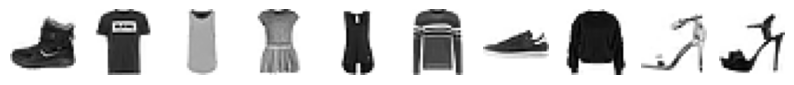

In [33]:
import matplotlib.pyplot  as plt
fig, axs = plt.subplots(1, 10, figsize=(10,10) )

for i in range(10):
    axs[i].imshow(x_train[i], cmap='gray_r')
    axs[i].axis('off')
plt.show()

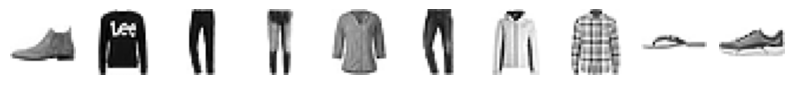

In [34]:
import matplotlib.pyplot  as plt
fig, axs = plt.subplots(1, 10, figsize=(10,10) )

for i in range(10):
    axs[i].imshow(X_test[i], cmap='gray_r')
    axs[i].axis('off')
plt.show()

In [35]:
print([y_train[i] for i in range(10)])

[np.uint8(9), np.uint8(0), np.uint8(0), np.uint8(3), np.uint8(0), np.uint8(2), np.uint8(7), np.uint8(2), np.uint8(5), np.uint8(5)]


In [36]:
import numpy as np
print(np.unique(y_train, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


In [37]:
norm_x_train =  x_train / 255    # MinMaxScale : 정규화
norm_X_test =  X_test / 255    # MinMaxScale : 정규화

In [38]:
norm_x_train.shape

(60000, 28, 28)

In [39]:
norm_X_test.shape

(10000, 28, 28)

In [41]:
norm_X_test.shape

(10000, 28, 28)

In [42]:
model = Sequential()
model.add(Input(shape=(28,28)))  # 모델 box에 input layer 추가
model.add(Flatten())
model.add(Dense(units=10, activation="softmax"))

In [43]:
model.compile(optimizer=SGD(learning_rate=0.001), 
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

In [44]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:
model.fit(norm_x_train,
          y_train,
          epochs=100,
          verbose=1,
          validation_split=0.2)

Epoch 1/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4520 - loss: 1.7798 - val_accuracy: 0.6658 - val_loss: 1.1619
Epoch 2/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6712 - loss: 1.1022 - val_accuracy: 0.7001 - val_loss: 0.9559
Epoch 3/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7041 - loss: 0.9371 - val_accuracy: 0.7211 - val_loss: 0.8622
Epoch 4/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7270 - loss: 0.8516 - val_accuracy: 0.7425 - val_loss: 0.8040
Epoch 5/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7458 - loss: 0.7976 - val_accuracy: 0.7543 - val_loss: 0.7644
Epoch 6/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7558 - loss: 0.7600 - val_accuracy: 0.7604 - val_loss: 0.7354
Epoch 7/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7650 - loss: 0.7323 - val_accuracy: 0.7681 - val_loss: 0.7092
Epoch 8/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7713 - loss: 0

In [46]:
model.evaluate(norm_X_test, Y_test)

#        loss                 accuracy
# [0.4942600727081299, 0.8296999931335449]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8356 - loss: 0.4857  


[0.4940298795700073, 0.8299000263214111]

In [47]:
model2 = Sequential()
model2.add(Input(shape=(28,28)))  # 모델 box에 input layer 추가
model2.add(Flatten())
model2.add(Dense(units=128, activation="sigmoid"))
model2.add(Dense(units=10, activation="softmax"))

In [48]:
model2.compile(optimizer=SGD(learning_rate=0.001), 
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

In [49]:
model2.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [50]:
hist2 = model2.fit(norm_x_train,
          y_train,
          epochs=100,
          verbose=1,
          validation_split=0.2)

Epoch 1/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2208 - loss: 2.3017 - val_accuracy: 0.5438 - val_loss: 1.9607
Epoch 2/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5694 - loss: 1.8903 - val_accuracy: 0.6540 - val_loss: 1.6892
Epoch 3/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6590 - loss: 1.6383 - val_accuracy: 0.6887 - val_loss: 1.4882
Epoch 4/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6898 - loss: 1.4509 - val_accuracy: 0.7053 - val_loss: 1.3379
Epoch 5/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7125 - loss: 1.3093 - val_accuracy: 0.7211 - val_loss: 1.2242
Epoch 6/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7164 - loss: 1.2060 - val_accuracy: 0.7255 - val_loss: 1.1354
Epoch 7/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7231 - loss: 1.1244 - val_accuracy: 0.7337 - val_loss: 1.0655
Epoch 8/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7306 - loss: 1

In [51]:
model2.evaluate(norm_X_test, Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8222 - loss: 0.5126   


[0.5194435119628906, 0.8152999877929688]

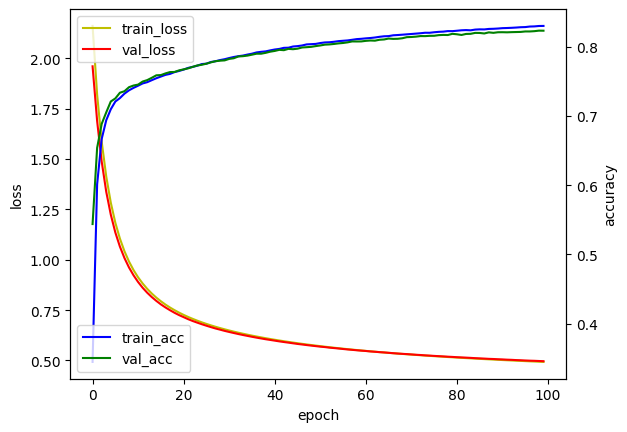

In [52]:
import matplotlib.pyplot as plt

hist = hist2

fig, loss_ax = plt.subplots()
loss_ax.plot(hist.history["loss"], "y", label="train_loss")
loss_ax.plot(hist.history["val_loss"], "r", label="val_loss")
loss_ax.set_xlabel("epoch")
loss_ax.set_ylabel("loss")
loss_ax.legend(loc="upper left")

acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history["accuracy"], "b", label="train_acc")
acc_ax.plot(hist.history["val_accuracy"], "g", label="val_acc")
acc_ax.set_ylabel("accuracy")
acc_ax.legend(loc="lower left")

In [55]:
model3 = Sequential()

model3.add(Input(shape=(28,28)))  # 모델 box에 input layer 추가
model3.add(Flatten())
model3.add(Dense(units=64, activation="relu"))
model3.add(Dense(units=10, activation="softmax"))

model3.compile(optimizer=SGD(learning_rate=0.001), 
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

model3.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,890 (198.79 KB)

 Trainable params: 50,890 (198.79 KB)

 Non-trainable params: 0 (0.00 B)

In [56]:
hist3 = model3.fit(norm_x_train,
          y_train,
          epochs=100,
          verbose=1,
          validation_split=0.2)

Epoch 1/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3544 - loss: 1.9486 - val_accuracy: 0.6690 - val_loss: 1.1712
Epoch 2/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6786 - loss: 1.0882 - val_accuracy: 0.7248 - val_loss: 0.8879
Epoch 3/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7291 - loss: 0.8642 - val_accuracy: 0.7509 - val_loss: 0.7785
Epoch 4/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7517 - loss: 0.7713 - val_accuracy: 0.7682 - val_loss: 0.7167
Epoch 5/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7698 - loss: 0.7101 - val_accuracy: 0.7779 - val_loss: 0.6773
Epoch 6/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7805 - loss: 0.6717 - val_accuracy: 0.7867 - val_loss: 0.6479
Epoch 7/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7876 - loss: 0.6473 - val_accuracy: 0.7923 - val_loss: 0.6218
Epoch 8/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7956 - loss: 0

In [57]:
model3.evaluate(norm_X_test, Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8585 - loss: 0.4159   


[0.42133641242980957, 0.8529999852180481]

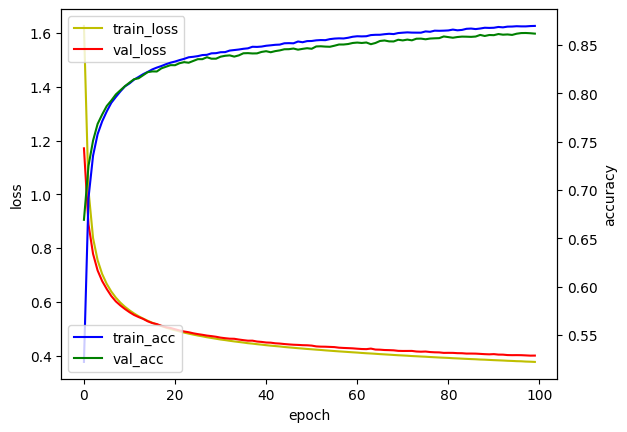

In [58]:
import matplotlib.pyplot as plt

hist = hist3
fig, loss_ax = plt.subplots()
loss_ax.plot(hist.history["loss"], "y", label="train_loss")
loss_ax.plot(hist.history["val_loss"], "r", label="val_loss")
loss_ax.set_xlabel("epoch")
loss_ax.set_ylabel("loss")
loss_ax.legend(loc="upper left")

acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history["accuracy"], "b", label="train_acc")
acc_ax.plot(hist.history["val_accuracy"], "g", label="val_acc")
acc_ax.set_ylabel("accuracy")
acc_ax.legend(loc="lower left")